In [ ]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload Dataset

In [ ]:
from emnist import list_datasets
import numpy as np
from emnist import extract_training_samples, extract_test_samples
import matplotlib.pyplot as plt

list_datasets()
#estrae dal dataset di training immagini con label appartenente alle lettere
images_training, labels_training = extract_training_samples('letters')

print("Data Training:")
print("(Numero elementi, altezza, larghezza) : "+str(images_training.shape))
print("Numero elementi : "+str(labels_training.shape))
print("Numero labels : "+str(len(np.unique(labels_training))))

#estrae dal dataset di testing immagini con label appartenente alle lettere
images_testing, labels_testing = extract_test_samples('letters')

print("Data Testing:")
print("(Numero elementi, altezza, larghezza) : "+str(images_testing.shape))
print("Numero elementi : "+str(labels_testing.shape))
print("Numero labels : "+str(len(np.unique(labels_testing))))

#for i in range(100):
#  print("Label n."+str(i)+" : "+str(labels_training[i]))

Data Training:
(Numero elementi, altezza, larghezza) : (124800, 28, 28)
Numero elementi : (124800,)
Numero labels : 26
Data Testing:
(Numero elementi, altezza, larghezza) : (20800, 28, 28)
Numero elementi : (20800,)
Numero labels : 26


Visualizzazioni immagini di training e di test

In [ ]:
#Visualization of the images of Training:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
images_training = images_training.reshape(images_training.shape[0],28,28)
for i,image in enumerate(images_training[0:100]):    
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)

plt.show()

In [ ]:
#Visualization of the images of Testing:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
images_testing = images_testing.reshape(images_testing.shape[0],28,28)
for i,image in enumerate(images_testing[0:25]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[800:825]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[1600:1625]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[2400:2425]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

Riduci dimensione dataset

In [ ]:
LABELS = ['','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def filterDataset(images, labels):
  assert labels.dtype == np.uint8
  classes = LABELS
  new_data_size = 0
  for i in range(0, labels.shape[0]):
    currentLabel = classes[labels[i]]
    if currentLabel == 'B' or currentLabel == 'Y' or currentLabel == 'G' or currentLabel == 'T':
      new_data_size += 1

  new_images = np.zeros((new_data_size, 28, 28), dtype = images.dtype)
  new_labels = np.zeros((new_data_size,), dtype = np.uint8)
    
  new_data_index = 0
  for i in range(0, labels.shape[0]):
    currentLabel = classes[labels[i]]

    if currentLabel != 'B' and currentLabel != 'Y' and currentLabel != 'G' and currentLabel != 'T':
      continue
        
    new_images[new_data_index] = images[i]
    new_labels[new_data_index] = labels[i]
    new_data_index += 1
    
  assert new_data_index == new_images.shape[0]
  return (new_images, new_labels)
  
def remodulate(y):
  y = np.where( y == LABELS.index("T"), 0, y) #T
  y = np.where( y == LABELS.index("B"), 1, y) #BLUE
  y = np.where( y == LABELS.index("Y"), 2, y) #YELLOW
  y = np.where( y == LABELS.index("G"), 3, y) #GREEN
  return y

def label(i):
  if i == 0 : return "T"
  if i == 1 : return "B"
  if i == 2 : return "Y"
  if i == 3 : return "G"

def num(i):
  if i == "T" : return 0
  if i == "B" : return 1 
  if i == "Y" : return 2
  if i == "G" : return 3 

In [ ]:
print(labels_training)
print(labels_testing)
(images_training, labels_training) = filterDataset(images_training, labels_training)
(images_testing, labels_testing) = filterDataset(images_testing, labels_testing)
print(labels_training)
print(labels_testing)
labels_training = remodulate(labels_training)
labels_testing = remodulate(labels_testing)

images_training = images_training.astype("float32") / 255
images_testing = images_testing.astype("float32") / 255

[23  7 16 ... 13 15 19]
[ 1  1  1 ... 26 26 26]
[ 7  2 25 ...  2  7  2]
[ 2  2  2 ... 25 25 25]


Visualizzazione

In [ ]:
print("Data Training:")
print("Numero elementi : "+str(labels_training.shape))
print("Numero labels : "+str(len(np.unique(labels_training))))

print("Data Testing:")
print("Numero elementi : "+str(labels_testing.shape))
print("Numero labels : "+str(len(np.unique(labels_testing))))

for i in range(len(labels_testing)):
  print("Label n."+str(i)+" : "+label(labels_testing[i]))
#print(labels_training)
#print(labels_testing)
#printImage(images_training)
#printImage(images_testing,400,20,20)

In [ ]:
#Visualization of the images of Training:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
images_training = images_training.reshape(images_training.shape[0],28,28)
for i,image in enumerate(images_training[0:100]):    
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)

plt.show()

In [ ]:
#Visualization of the images of Testing:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
images_testing = images_testing.reshape(images_testing.shape[0],28,28)
for i,image in enumerate(images_testing[0:25]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[800:825]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[1600:1625]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()
for i,image in enumerate(images_testing[2400:2425]):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

Reshape

In [ ]:
feature_vector_length = 784
images_training = images_training.reshape(images_training.shape[0],feature_vector_length)
images_testing = images_testing.reshape(images_testing.shape[0],feature_vector_length)

#minmax x-min/(max-min)
#images_training = (images_training.astype("float32")-np.min(images_training))/(np.max(images_training)-np.min(images_training))
#images_testing = (images_testing.astype("float32")-np.min(images_testing))/(np.max(images_testing)-np.min(images_testing))

#print("===Dopo minmax===")
#print(images_training[0])

# **Modello 3 Layer Nascosti**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
num_classes = 4

#add more layers
model  = keras.Sequential()
model.add(layers.Dense(512 ,activation = "relu",input_shape = (784,)))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(num_classes, activation = "softmax"))

batch_size = 128
epochs = 15
#crossentropy

#feature_vector_length = 784
#images_training = images_training.reshape(images_training.shape[0],feature_vector_length)
#images_testing = images_testing.reshape(images_testing.shape[0],feature_vector_length)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1 = model.fit(images_training, labels_training, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.save("model.h5")

Epoch 1/15
135/135 [==============================] - 3s 14ms/step - loss: 0.2780 - accuracy: 0.9027 - val_loss: 0.1372 - val_accuracy: 0.9568
Epoch 2/15
135/135 [==============================] - 2s 12ms/step - loss: 0.1030 - accuracy: 0.9666 - val_loss: 0.1060 - val_accuracy: 0.9651
Epoch 3/15
135/135 [==============================] - 2s 13ms/step - loss: 0.0606 - accuracy: 0.9806 - val_loss: 0.1175 - val_accuracy: 0.9599
Epoch 4/15
135/135 [==============================] - 2s 13ms/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.1344 - val_accuracy: 0.9604
Epoch 5/15
135/135 [==============================] - 2s 12ms/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0906 - val_accuracy: 0.9760
Epoch 6/15
135/135 [==============================] - 2s 13ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.1007 - val_accuracy: 0.9750
Epoch 7/15
135/135 [==============================] - 2s 13ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.1051 - val_accuracy: 0.9734

# **Modello 5 Layer Nascosti**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
num_classes = 4

model  = keras.Sequential()

model.add(layers.Dense(512 ,activation = "relu",input_shape = (784,)))

model.add(layers.Dense(256, activation = "relu"))

model.add(layers.Dense(128, activation = "relu"))

model.add(layers.Dense(64, activation = "relu"))

model.add(layers.Dense(num_classes, activation = "softmax"))

batch_size = 128
epochs = 15

#crossentropy
feature_vector_length = 784
images_training = images_training.reshape(images_training.shape[0],feature_vector_length)
images_testing = images_testing.reshape(images_testing.shape[0],feature_vector_length)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model.fit(images_training, labels_training, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.save("model.h5")

Epoch 1/15
135/135 [==============================] - 3s 18ms/step - loss: 0.2935 - accuracy: 0.8960 - val_loss: 0.1666 - val_accuracy: 0.9474
Epoch 2/15
135/135 [==============================] - 2s 16ms/step - loss: 0.1092 - accuracy: 0.9645 - val_loss: 0.0966 - val_accuracy: 0.9667
Epoch 3/15
135/135 [==============================] - 2s 15ms/step - loss: 0.0671 - accuracy: 0.9785 - val_loss: 0.0915 - val_accuracy: 0.9719
Epoch 4/15
135/135 [==============================] - 2s 16ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.1114 - val_accuracy: 0.9672
Epoch 5/15
135/135 [==============================] - 2s 15ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1312 - val_accuracy: 0.9672
Epoch 6/15
135/135 [==============================] - 2s 14ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.1117 - val_accuracy: 0.9729
Epoch 7/15
135/135 [==============================] - 2s 15ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.1235 - val_accuracy: 0.9703

In [ ]:
score = model.evaluate(images_testing, labels_testing, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

predict_b = model.predict(images_testing[0:1])
predict_g = model.predict(images_testing[800:801])
predict_t = model.predict(images_testing[1600:1601])
predict_y = model.predict(images_testing[2400:2401])
classes_b = np.argmax(predict_b)
print("Classe b predetta:"+label(classes_b))
classes_g = np.argmax(predict_g)
print("Classe g predetta:"+label(classes_g))
classes_t = np.argmax(predict_t)
print("Classe t predetta:"+label(classes_t))
classes_y = np.argmax(predict_y)
print("Classe y predetta:"+label(classes_y))

Test loss: 0.13764184713363647
Test accuracy: 0.9743750095367432
1/1 [==============================] - 0s 16ms/step
Classe b predetta:B
Classe g predetta:G
Classe t predetta:T
Classe y predetta:Y


In [ ]:
def is_vertical(line):
    return line[0]==line[2]
def is_horizontal(line):
    return line[1]==line[3]

def overlapping_filter(lines, sorting_index):
    filtered_lines = []
    
    lines = sorted(lines, key=lambda lines: lines[sorting_index])
    separation = 5
    for i in range(len(lines)):
            l_curr = lines[i]
            if(i>0):
                l_prev = lines[i-1]
                if ( (l_curr[sorting_index] - l_prev[sorting_index]) > separation):
                    filtered_lines.append(l_curr)
            else:
                filtered_lines.append(l_curr)
                
    return filtered_lines

def get_cropped_image(image, x, y, w, h):
    cropped_image = image[ y:y+h , x:x+w ]
    return cropped_image
def get_ROI(image, horizontal, vertical, left_line_index, right_line_index, top_line_index, bottom_line_index, offset=4):
    x1 = vertical[left_line_index][2] + offset
    y1 = horizontal[top_line_index][3] + offset
    x2 = vertical[right_line_index][2] - offset
    y2 = horizontal[bottom_line_index][3] - offset
    
    w = x2 - x1
    h = y2 - y1
    
    cropped_image = get_cropped_image(image, x1, y1, w, h)
    
    return cropped_image, (x1, y1, w, h)

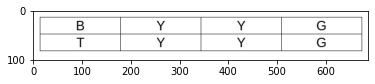

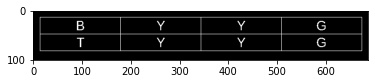

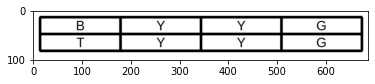

Orizzontali:3
Verticali:5


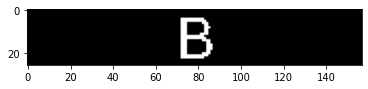

(26, 157)


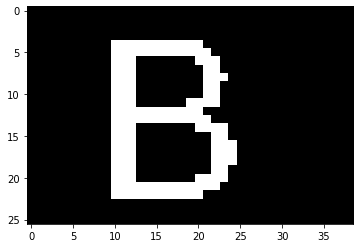

(26, 39)
(28, 28)


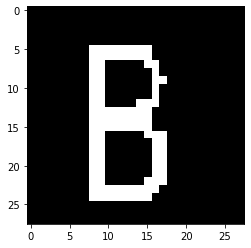

1/1 [==============================] - 0s 61ms/step
Classe: B


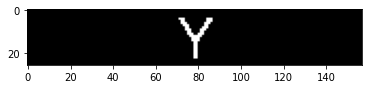

(26, 157)


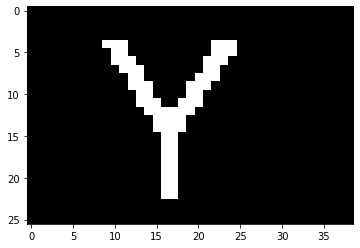

(26, 39)
(28, 28)


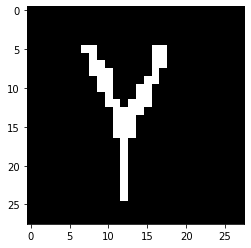

1/1 [==============================] - 0s 23ms/step
Classe: Y


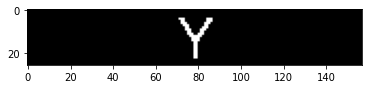

(26, 157)


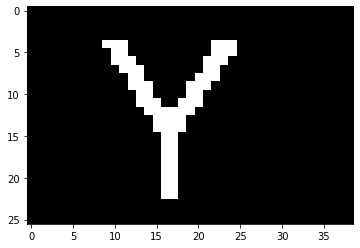

(26, 39)
(28, 28)


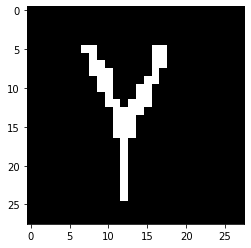

1/1 [==============================] - 0s 25ms/step
Classe: Y


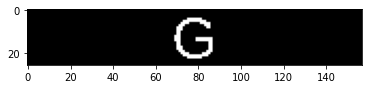

(26, 157)


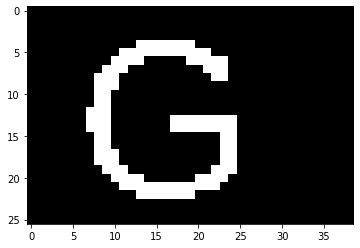

(26, 39)
(28, 28)


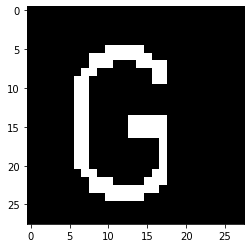

1/1 [==============================] - 0s 25ms/step
Classe: G


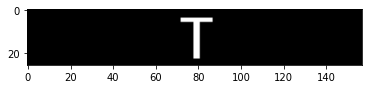

(26, 157)


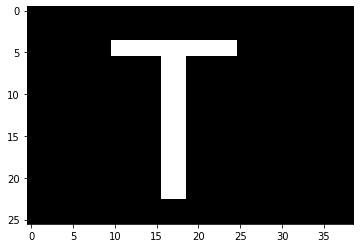

(26, 39)
(28, 28)


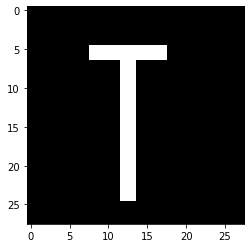

1/1 [==============================] - 0s 26ms/step
Classe: T


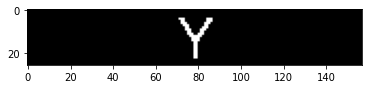

(26, 157)


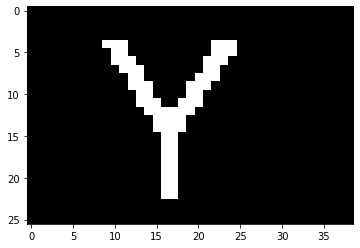

(26, 39)
(28, 28)


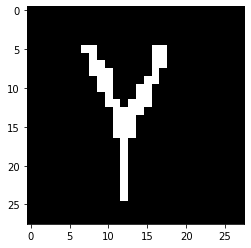

1/1 [==============================] - 0s 18ms/step
Classe: Y


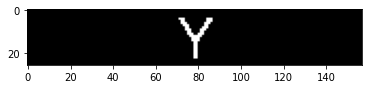

(26, 157)


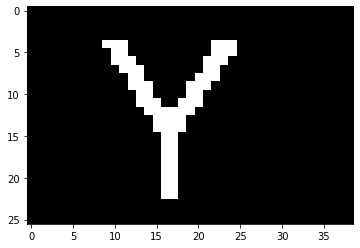

(26, 39)
(28, 28)


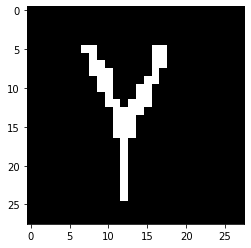

1/1 [==============================] - 0s 17ms/step
Classe: Y


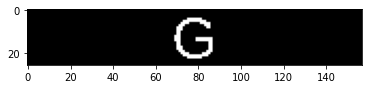

(26, 157)


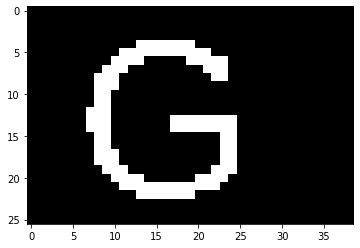

(26, 39)
(28, 28)


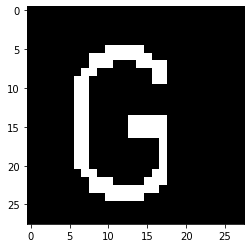

1/1 [==============================] - 0s 18ms/step
Classe: G


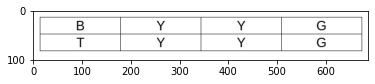

['B', 'Y', 'Y', 'G']
['T', 'Y', 'Y', 'G']


In [ ]:
import cv2 as cv
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image


#read your file
file=r'/content/drive/MyDrive/Università/Intelligenza Artificiale/Progetto/prova.png'
img = cv.imread(file,0)
cImage = np.copy(img) #image to draw lines
#Plotting the image to see the output
plotting = plt.imshow(img,cmap='gray')
plt.show()

#thresholding the image to a binary image
thresh,img_bin = cv.threshold(img,128,255,cv.THRESH_BINARY |cv.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

rho = 1
theta = np.pi/180
threshold = 50
minLinLength = 50
maxLineGap = 6
#Trova linee
linesP = cv.HoughLinesP(img_bin, rho , theta, threshold, None, minLinLength, maxLineGap)

vertical_lines = []
horizontal_lines = []

#Divide tra linee orizzontali e verticali
if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    if (is_vertical(l)):
      vertical_lines.append(l)       
    elif (is_horizontal(l)):
      horizontal_lines.append(l)

  horizontal_lines = overlapping_filter(horizontal_lines, 1)
  vertical_lines = overlapping_filter(vertical_lines, 0)

for i, line in enumerate(horizontal_lines):
  cv.line(cImage, (line[0], line[1]), (line[2], line[3]), (0,255,0), 3, cv.LINE_AA)
                      
for i, line in enumerate(vertical_lines):
  cv.line(cImage, (line[0], line[1]), (line[2], line[3]), (0,0,255), 3, cv.LINE_AA)

plotting = plt.imshow(cImage,cmap='gray')
plt.show()

model_letters = tf.keras.models.load_model('model.h5')
counter = 0
print("Orizzontali:"+str(len(horizontal_lines)))
print("Verticali:"+str(len(vertical_lines)))
(thresh, bw) = cv.threshold(img_bin, 100, 255, cv.THRESH_BINARY)
tab=list()
for j in range(len(horizontal_lines)-1):
  tab.append(list())
  for i in range(len(vertical_lines)-1):    
    counter += 1
    #Ritaglia immagine      
    cropped_image, (x,y,w,h) = get_ROI(bw, horizontal_lines, vertical_lines, i, i+1, j, j+1)
        
    plotting = plt.imshow(cropped_image,cmap='gray')
    plt.show()
    print(cropped_image.shape)
    if(cropped_image.shape[1]<100):
      x=int(cropped_image.shape[1]/3)+2
      w=int(cropped_image.shape[1]/3)-1
    else:
      x=int(cropped_image.shape[1]/3)+10
      w=int(cropped_image.shape[1]/4)
    cropped_image = cropped_image[:,x:x+w]
    plotting = plt.imshow(cropped_image,cmap='gray')
    plt.show()
    print(cropped_image.shape)

    feature_vector_length = 784
    #im = cropped_image.resize((28, 28))
    #im = cropped_image.reshape(cropped_image.shape[0],feature_vector_length)    
    im = cv.resize(cropped_image, dsize=(28, 28), interpolation=cv.INTER_NEAREST)

    print(im.shape)
    plotting = plt.imshow(im,cmap='gray')
    plt.show()

    im = im.reshape(feature_vector_length)
    im = im.astype("float32")/255
    im = tf.expand_dims(im, 0)
    
    prediction = model_letters.predict(im)
    classe = np.argmax(prediction)
    print("Classe: "+label(classe))
    tab[j].append(label(classe))

plotting = plt.imshow(img,cmap='gray')
plt.show()
for i in range(len(tab)):
  print(tab[i])     

Grafici Training

In [ ]:
#Modello 1
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Modello 2
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Matrice di confusione

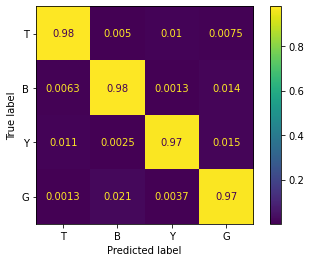

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label_pred = model.predict(images_testing)
label_pred = np.argmax(label_pred, axis = 1)

confusionMatrix = confusion_matrix(labels_testing, label_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ['T','B','Y','G'])
disp.plot()
plt.show()

Precision, Recall e F1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_testing, label_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       800
           1       0.97      0.98      0.98       800
           2       0.98      0.97      0.98       800
           3       0.96      0.97      0.97       800

    accuracy                           0.98      3200
   macro avg       0.98      0.98      0.98      3200
weighted avg       0.98      0.98      0.98      3200



Euristica miglior percorso

In [ ]:
!git clone https://github.com/aimacode/aima-python.git

Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5095 (delta 0), reused 2 (delta 0), pack-reused 5092
Receiving objects: 100% (5095/5095), 17.71 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (3416/3416), done.


Definizione euristiche e classi problema

In [ ]:
import sys
sys.path.append("aima-python")
import numpy as np
import itertools
from enum import Enum
import random
from search import *
import time

cost_direction=1  #Costo spostamento

#Classe direzioni possibili
class Directions(Enum):
    UP = (-1, 0)
    DOWN = (1, 0)
    LEFT = (0, -1)
    RIGHT = (0, 1)

#Classe colori possibili
class Colors(Enum):
    BLUE = 1
    YELLOW = 2
    GREEN = 3

#Classe euristiche disponibili
class Heuristic(Enum):
    BEST_PATH = 0
    NEAREST_NEIGHBOR = 1

#Classe stato griglia e puntatore
class State():
    def __init__(self, grid, x, y):
        self.grid = grid
        self.x = x
        self.y = y
        self.id = str(x)+str(y)
        for row in grid:
            for cell in row:
                self.id = self.id+str(cell)

    def __lt__(self, state):
        return False

class UniformColoring(Problem):
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, heuristic_type=Heuristic.NEAREST_NEIGHBOR):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal.  Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.heuristic_type=heuristic_type

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        actions=[]
        if (state.x != self.initial.x) or (state.y != self.initial.y):  #Se non si trova sulla cella iniziale
            for color in Colors:  # action colora cella, per ogni colore nella classe Colors
                if (color.value != state.grid[state.x][state.y]): #Se il valore del colore è diverso da quello in cui si trova ora la testina
                    actions.append(color) #Aggiunge alla lista delle azioni di colorare quella cella
        for direction in Directions:  # action muovi testina, per ogni direzione possibile
            coords=(state.x+direction.value[0],state.y+direction.value[1])  #Verifica se spostandosi nella direzione presente, si rimane all'interno della griglia
            if coords[0] in range(grid.shape[0]) and coords[1] in range(grid.shape[1]): 
                actions.append(direction)   #Se ci rimane aggiunge lo spostamento in quella direzione nella lista di azioni
        return actions  #Ritorna la lista delle azioni possibili

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        if action in Directions:  #Se azione fa parte di Directions, allora sposta la testina dallo stato attuale in cui si trova, nella direzione indicata nell'azione
            return State(state.grid,state.x+action.value[0],state.y+action.value[1])  #Ritorna un nuovo stato con la nuova posizione attuale della testina
        else:
            grid=np.copy(state.grid)  #Copia la griglia attuale
            grid[state.x][state.y]=action.value   #Colora la cella attuale con il valore del colore presente nell'azione
            return State(grid,state.x,state.y)    #Ritorna un nuovo stato, con la nuova griglia colorata e la posizione della testina su cui già si trovava

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        test_color = None
        if ((state.x, state.y) == (self.initial.x, self.initial.y)):  #Se la posizione attuale della testina è la stessa dello stato iniziale
            for color in Colors:  #Per ogni colore nella classe Colors
                if color.value in state.grid:   #Se quel colore è presente nella griglia attuale
                    if test_color == None: 
                        test_color = color.value  #test_color prende il valore del primo colore che è presente nella griglia 
                    if color.value != test_color: #Se è presente nella griglia qualsiasi altro colore diverso da quello trovato precedentemente nella griglia
                        return False              #Allora non tutta la griglia è colorata con lo stesso colore--> goal_test=False
        else:   #Se la testina non si trova nella posizione dove si trovava inizialmente --> goal_test=False
            return False
        return True   #Se invece non sono presenti altri colori nella griglia, è colorata tutta con lo stesso colore --> goal_test=True

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        if action in Colors:
            return c + action.value
        return c + cost_direction

    def manhattan_distance(self, coord1, coord2):   #Calcola distanza tra coord1 e coord2
            return abs(coord2[0] - coord1[0]) + abs(coord2[1] - coord1[1])

    def heuristic(self, node, color):   #In base all'euristica scelta, richiama la funzione associata
        if self.heuristic_type == Heuristic.NEAREST_NEIGHBOR:
            return self.heuristic_nearest_neighbor(node, color)
        elif self.heuristic_type == Heuristic.BEST_PATH:
            return self.heuristic_best_path(node, color)

    def heuristic_best_path(self, node, color):
        """Verifica prima quante sono le celle da colorare con il colore indicato e ne somma il costo, se sono più di una (compresa quella in cui si trova),
        calcola tutte le possibili permutazioni delle celle da colorare, per ogni permutazione (percorso) calcola la distanza totale percorsa per spostarsi tra le celle
        Infine prende la distanza più corta tra le varie permutazioni e ritorna la somma tra il costo per colorare e il costo per spostarsi.
        Calcola il costo per ogni possibile percorso (pesante) e prende quello con costo più basso--> Ottimo globale"""
        color_cost = 0
        grid = node.state.grid
        x = node.state.x
        y = node.state.y
        not_colored = []
        for i in range(len(grid)):  #Scorre righe
            for j in range(len(grid[i])):   #Scorre colonne
                if(grid[i][j] != color and grid[i][j] != 0):  #Se posizione [i][j] non è colorata con il colore richiesto ma è colorata
                    if (i,j) != (node.state.x,node.state.y): #Se posizione [i][j] diversa da posizione attuale testina
                      not_colored.append((i, j))  #Aggiunge cella in pos [i][j] alla lista dei non colorati
                    color_cost += color   #Somma al costo totale per caricare, il costo del colore da applicare alla cella indicata

        distance = None
        if (len(not_colored)>0):  #Se ci sono celle da colorare
            permutations = list(itertools.permutations(not_colored))  #Calcola tutte le possibili permutazioni delle celle da colorare
        else:
            distance = self.manhattan_distance( #Se tutte le celle sono state colorare, aggiunge al costo totale, il costo per ritornare nella posizione iniziale
                          (node.state.x, node.state.y), (self.initial.x, self.initial.y))
            return color_cost + (distance * cost_direction)

        for permutation in permutations:    #Scorre tutte le possibili permutazioni
            temp_distance = 0 #Distanza temporanea
            for i in range(len(permutation)):   #Itera per il numero di celle da colorare presenti nella permutazione
                if (i+1) in range(len(permutation)):  #Se non si trova all'ultima cella della permutazione
                    temp_distance += self.manhattan_distance(permutation[i], permutation[i+1])  #Calcola distanza tra cella i e quella successiva
            temp_distance += self.manhattan_distance((node.state.x, node.state.y), permutation[0])  #Aggiunge distanza tra posizione attuale e quella da cui inizia il path
            temp_distance += self.manhattan_distance(permutation[len(permutation)-1], (self.initial.x, self.initial.y)) #Aggiunge distanza da cella finale path alla cella iniziale della testina 
            
            if distance == None:  #Se distanza non impostata
                distance = temp_distance  #Gli assegna la distanza temporanea, calcolata in precedenza
            elif temp_distance < distance:  #Se già impostata, verifica se quella temporanea appena calcolata è più piccola rispetto a quella presente
                distance = temp_distance  
          
        return color_cost + distance * cost_direction #Ritorna la somma tra il costo per colorare e tra il prodotto della distanza con il costo per ogni spostamento

    def heuristic_nearest_neighbor(self, node, color):
        """Scorre la griglia, per ogni cella che non è del colore richiesto, la inserisce nella lista di quelle da colorare e somma il costo per colorare ognuna di queste
        Dopo calcola la distanza dalla posizione attuale a quella delle altre celle da colorare e prende quella più vicina, somma il costo per arrivaci, 
        si sposta in quella cella e la rimuove tra quelle da colorare. 
        Ripete il procedimento cercando la prossima cella più vicina da quella che è diventata l'attuale, si sposta, somma costo e rimuove da lista,
        per tutte le celle presenti nella lista da colorare.
        Infine aggiunge al costo totale il costo dello spostamento dalla cella in cui si trova a quella di partenza.
        Trova via via il vicino più vicino (leggero) e ci si sposta--> Ottimo locale """
        cost = 0
        grid = node.state.grid
        not_colored = []
        for i in range(grid.shape[0]):  #Scorre righe
            for j in range(grid.shape[1]):  #Scorre colonne
                if(grid[i][j] != color and grid[i][j] != 0):  #Se posizione [i][j] non è colorata con il colore richiesto ma è colorata
                    not_colored.append((i, j))  #Aggiunge cella in pos [i][j] alla lista dei non colorati
                    cost += color   ##Somma al costo totale per caricare, il costo del colore da applicare alla cella indicata
        x = node.state.x
        y = node.state.y
        for i in range(len(not_colored)): #Itera per il numero di celle da colorare 
            #Assegna a distance la tupla con (distanza tra la prima cella da colorare e la posizione attuale), coordinate cella da colorare)
            distance = (self.manhattan_distance((not_colored[0][0],not_colored[0][1]),(x,y)), not_colored[0])
            for cell in not_colored:  #Scorre celle nella lista delle non colorate
                #Assegna tupla con (distanza tra cella da colorare e posizione attuale), coordinate cella da colorare
                temp_distance = (self.manhattan_distance((cell[0],cell[1]),(x,y)), cell)
                if (temp_distance < distance):  #Se la distanza calcolata è minore della migliore trovata fino a quel momento
                    distance = temp_distance
            cost += (distance[0] * cost_direction)  #Aggiunge al costo totale, il costo dello spostamento alla cella più vicina
            x = distance[1][0]
            y = distance[1][1]
            not_colored.remove(distance[1]) #Rimuove la cella trovata come più vicina, dalla lista di quelle da colorare 
        cost += (self.manhattan_distance((self.initial.x,self.initial.y),(x,y)) * cost_direction) #Somma al costo totale la distanza dalla posizione attuale a quella di partenza
        return cost

    def h(self, node):
        """ Return the heuristic value for a given state."""
        x,y=(node.state.x,node.state.y)
        cost = None
        if node.action != None and node.action in Colors: #Se l'azione è colorare una cella
            cost = self.heuristic(node, node.action.value) #Richiama l'heuristica scelta con il colore presente nell'azione, ritorna il costo dell'euristica per colorare con il colore assegnato
            #print("Heuristic value:", cost, node.state.grid, x,y)
            return cost
        parent=node.parent
        color=None
        #Se l'azione è uno spostamento, si prende il colore del padre come colore scelto
        if parent != None:
            color=parent.state.grid[parent.state.x][parent.state.y]
        if (x,y) == (self.initial.x,self.initial.y) or color==0: #Se non ho un colore del parent, scelgo quello che minimizza l'euristica
            cost = None
            for color in Colors:
                temp_cost = self.heuristic(node, color.value)
                if cost == None:
                    cost=temp_cost
                elif temp_cost < cost:
                    cost = temp_cost
            #print("Heuristic 0,0 value:", cost)
            return cost
        else:
            cost = self.heuristic(node, color)
            #print("Heuristic value:", cost, node.state.grid, x,y)
            return cost

Tecniche di Ricerca

In [ ]:
def best_first_graph_search(problem, f, display=True):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    f = memoize(f, 'f')
    node = Node(problem.initial)  #Inizialliza con griglia e cella iniziale
    #print("#COORDS0:", node.state.i, node.state.j, node.state.grid)
    frontier = PriorityQueue('min', f)  #Inizializza come PriorityQueue
    frontier.append(node) #Aggiunge nodo iniziale
    lookup_frontier=set() #Crea set nodi da esplorare
    lookup_frontier.add(id(node)) #Aggiunge id nodo iniziale
    explored = set()  #Crea set nodi esplorati
    while frontier: #Finchè frontier != None
        #print("frontiera:", len(frontier))
        node = frontier.pop() #Preleva da frontier
        #print("#NODE:", node.state.i, node.state.j, node.state.grid)
        lookup_frontier.remove(id(node))  #Rimuove nodo da frontiera da guardare
        if problem.goal_test(node.state): #Se lo stato del nodo supera goal_test 
            if display: #Se variabile display=True
                print("Percorsi esplorati: ", len(explored), "\n Percorsi non esplorati:", len(frontier))
            return node #Ritorna nodo
        explored.add(node.state.id) #Aggiunge nodo a quelli esplorati
        for child in node.expand(problem):  #Per ogni figlio di node
            #print("#CHILD:", node.state.i, node.state.j, node.state.grid)
            if child.state.id not in explored and id(child) not in lookup_frontier: #Se child non presente nei nodi esplorati e in quelli da esplorare, li aggiunge alla frontiera
                lookup_frontier.add(id(child))
                frontier.append(child)
            elif id(child) in lookup_frontier:  #Se è presente nei nodi da esplorare
                if f(child) < frontier[child]:  #Se costo figlio è minore di quello in frontiera
                    del frontier[child]         #Cancella nodo in frontiera
                    lookup_frontier.add(id(child))
                    frontier.append(child)      #Lo riaggiunge in frontiera come figlio del nodo esplorato
    return None

def uniform_cost_search(problem, display=True):
    #Ricerca non informata
    start_time = time.time()
    print("Esecuzione uniform_cost_search...")
    sol = best_first_graph_search(problem, lambda node: node.path_cost, display)
    print("Tempo esecuzione: %s secondi" % (time.time() - start_time))
    return sol

def astar_search(problem, h=None, display=True):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    #Ricerca informata con costo euristica
    print("Esecuzione astar_search...")
    start_time = time.time()
    h = memoize(h or problem.h, 'h')
    sol = best_first_graph_search(problem, lambda n: n.path_cost + h(n), display)
    print("Tempo esecuzione: %s secondi" % (time.time() - start_time))
    return sol

Inizializzazione problema con scelta euristica

In [ ]:
"""
grid=np.array([[0, 2, 2, 3], 
               [2, 2, 3, 2], 
               [3, 3, 2, 2], 
               [1, 3, 3, 3]])
"""
print(tab)
tab_num=list()
for i in range(len(tab)):
  tab_num.append(list())
  for j in range(len(tab[i])):
    tab_num[i].append(num(tab[i][j]))
print(tab_num)
grid=np.array(tab_num)
for i in range(grid.shape[0]):  #Scorre righe
  for j in range(grid.shape[1]):  #Scorre colonne
    if grid[i][j]==0: #Se cella è quella iniziale dove presente testina
      initial_state=State(grid,i,j) #Inizializza uno stato con le cordinate della cella indicata, sarà lo stato iniziale
      break

user_input=''
user_input = input("Seleziona l'euristica: (1 carattere) \n -'b' : BEST_PATH \n -'n' : NEAREST_NEIGHBOR\n")[0]
if (user_input == 'b' or user_input == 'B'):
  problem=UniformColoring(initial_state,Heuristic.BEST_PATH)  #Inizializza il problema passando lo stato iniziale e l'euristica da utilizzare
  print("Euristica selezionata: BEST_PATH")
elif (user_input == 'n' or user_input == 'N'):
    problem=UniformColoring(initial_state,Heuristic.NEAREST_NEIGHBOR)
    print("Euristica selezionata: NEAREST_NEIGHBOR") 
else:
  problem=UniformColoring(initial_state,Heuristic.BEST_PATH)
  print("Carattere sbagliato, le uniche opzioni disponibili sono 'b' e 'n' \nViene scelto BEST_PATH per default")
  print("Euristica selezionata: BEST_PATH")

[['B', 'Y', 'Y', 'G'], ['T', 'Y', 'Y', 'G']]
[[1, 2, 2, 3], [0, 2, 2, 3]]
Seleziona l'euristica: (1 carattere) 
 -'b' : BEST_PATH 
 -'n' : NEAREST_NEIGHBOR
b
Euristica selezionata: BEST_PATH


Scelta ed esecuzione tecnica di ricerca

In [ ]:
user_input = input("Seleziona la tecnica di ricerca: (1 carattere) \n -'a' : A* SEARCH \n -'u' : UNIFORM COST SEARCH\n")[0]
if (user_input == 'a' or user_input == 'A'):
  print("Tecnica di ricerca selezionata: A* SEARCH")
  res = astar_search(problem)
elif (user_input == 'u' or user_input == 'U'):
  print("Tecnica di ricerca selezionata: UNIFORM COST SEARCH")
  res = uniform_cost_search(problem)
else:
  print("Carattere sbagliato, le uniche opzioni disponibili sono 'a' e 'u' \n Viene scelto A* SEARCH per default")
  print("Tecnica di ricerca selezionata: A* SEARCH")
  res = astar_search(problem)
#res = best_first_graph_search(problem, lambda n: n.path_cost, display=True) == uniform_cost_search(problem)
sol=res.solution()
print("Stato griglia iniziale: \n",initial_state.grid)
print("Stato griglia finale: \n",res.state.grid)
print("Costo soluzione: ",res.path_cost)
print("Passi per arrivare a soluzione: ",len(sol))

Seleziona la tecnica di ricerca: (1 carattere) 
 -'a' : A* SEARCH 
 -'u' : UNIFORM COST SEARCH
u
Tecnica di ricerca selezionata: UNIFORM COST SEARCH
Esecuzione uniform_cost_search...
Percorsi esplorati:  5238 
 Percorsi non esplorati: 22298
Tempo esecuzione: 4.096402168273926 secondi
Stato griglia iniziale: 
 [[1 2 2 3]
 [0 2 2 3]]
Stato griglia finale: 
 [[1 1 1 1]
 [0 1 1 1]]
Costo soluzione:  14
Passi per arrivare a soluzione:  14


Visualizza Azioni

In [ ]:
node_list=[]
node=res
while node!=None: #Scorre tutti i node, salendo al parente ogni volta, fino a quello senza parente
  node_list.insert(0,node)
  node=node.parent
i=0
node=node_list.pop(0)
print("\nTestina in posizione: (",node.state.x,",",node.state.y,")")
print("Stato griglia INIZIALE passo n. ",i," :\n",node.state.grid)
for action in sol:
  i+=1
  print("==============\n")
  print("Azione: ",action)
  node=node_list.pop(0)
  print("Testina in posizione: (",node.state.x,",",node.state.y,")")
  if i != len(sol):
    print("Stato griglia passo n. ",i," :\n",node.state.grid)
  else:
    print("Stato griglia FINALE passo n. ",i," :\n",node.state.grid)


Testina in posizione: ( 0 , 0 )
Stato griglia INIZIALE passo n.  0  :
 [[0 2 2]
 [2 1 3]
 [2 2 1]]

Azione:  Directions.DOWN
Testina in posizione: ( 1 , 0 )
Stato griglia passo n.  1  :
 [[0 2 2]
 [2 1 3]
 [2 2 1]]

Azione:  Directions.RIGHT
Testina in posizione: ( 1 , 1 )
Stato griglia passo n.  2  :
 [[0 2 2]
 [2 1 3]
 [2 2 1]]

Azione:  Colors.YELLOW
Testina in posizione: ( 1 , 1 )
Stato griglia passo n.  3  :
 [[0 2 2]
 [2 2 3]
 [2 2 1]]

Azione:  Directions.RIGHT
Testina in posizione: ( 1 , 2 )
Stato griglia passo n.  4  :
 [[0 2 2]
 [2 2 3]
 [2 2 1]]

Azione:  Colors.YELLOW
Testina in posizione: ( 1 , 2 )
Stato griglia passo n.  5  :
 [[0 2 2]
 [2 2 2]
 [2 2 1]]

Azione:  Directions.DOWN
Testina in posizione: ( 2 , 2 )
Stato griglia passo n.  6  :
 [[0 2 2]
 [2 2 2]
 [2 2 1]]

Azione:  Colors.YELLOW
Testina in posizione: ( 2 , 2 )
Stato griglia passo n.  7  :
 [[0 2 2]
 [2 2 2]
 [2 2 2]]

Azione:  Directions.UP
Testina in posizione: ( 1 , 2 )
Stato griglia passo n.  8  :
 [[0 2 

# **Riconoscimento Tabella**

Caricamento Immagine

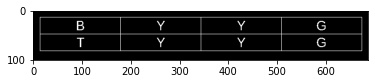

In [ ]:
import cv2
import pandas as pd
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file=r'/content/drive/MyDrive/Università/Intelligenza Artificiale/Progetto/prova2.jpg'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/content/drive/MyDrive/Università/Intelligenza Artificiale/Progetto/prova2_inverted.jpg',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

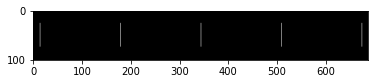

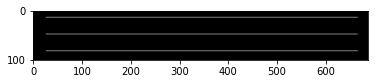

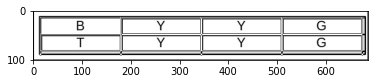

In [ ]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//80
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=4)
cv2.imwrite("vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
#plotting = plt.imshow(img_vh,cmap='gray')
#plt.show()
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

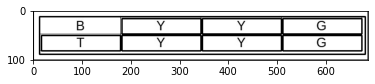

In [ ]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
      reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
      i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<2 and h<2):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap="gray")
plt.show()